In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
import yfinance as yf
import datetime as dt

stock = "POWERGRID.NS"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2024, 11, 1)

df = yf.download(stock, start, end)

/tmp/ipykernel_11610/2487901451.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,32.385574,35.250700,26.767997,28.908793,855215656
2007-10-08,30.727669,33.480121,30.534513,33.480121,126671715
2007-10-09,32.820179,33.109910,29.085858,30.743766,116725709
2007-10-10,33.126003,33.802045,32.836272,33.673274,67931378
2007-10-11,36.828125,38.630901,32.836267,38.630901,106320954


In [4]:
df.shape

(4208, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4208 entries, 2007-10-05 to 2024-10-31
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4208 non-null   float64
 1   (High, POWERGRID.NS)    4208 non-null   float64
 2   (Low, POWERGRID.NS)     4208 non-null   float64
 3   (Open, POWERGRID.NS)    4208 non-null   float64
 4   (Volume, POWERGRID.NS)  4208 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 197.2 KB


In [6]:
df.isnull().sum()

Price   Ticker      
Close   POWERGRID.NS    0
High    POWERGRID.NS    0
Low     POWERGRID.NS    0
Open    POWERGRID.NS    0
Volume  POWERGRID.NS    0
dtype: int64

In [7]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4208.000000,4208.000000,4208.000000,4208.000000,4.208000e+03
mean,79.255946,80.286305,78.238144,79.292804,1.188963e+07
std,63.621687,64.365266,62.829875,63.603316,2.061999e+07
min,18.908407,20.212435,16.952366,20.114632,0.000000e+00
25%,36.349715,36.923180,35.812873,36.386940,4.799653e+06
50%,55.232327,55.870069,54.493160,55.338368,8.344398e+06
75%,82.704769,83.691960,81.724080,82.727268,1.362032e+07
max,356.113861,356.893408,348.074624,354.749603,8.552157e+08


In [8]:
df = df.reset_index()

In [9]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [10]:
df.to_csv("powergrid.csv")

In [11]:
data01 = pd.read_csv("powergrid.csv")

In [12]:
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05,32.38557434082031,35.2507003581886,26.76799662291043,28.908793360303974,855215656
2,1,2007-10-08,30.72766876220703,33.48012071257007,30.534513396740614,33.48012071257007,126671715
3,2,2007-10-09,32.8201789855957,33.109909879074095,29.08585756305142,30.743766243977518,116725709
4,3,2007-10-10,33.12600326538086,33.80204486122549,32.83627240041195,33.67327388987095,67931378


In [13]:
# Candlesticks 
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'], 
                                    high = data01['High'],
                                    low = data01['Low'], 
                                    close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [14]:
df = df.drop(['Date'], axis = 1)

/tmp/ipykernel_11610/1002300862.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [15]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,32.385574,35.250700,26.767997,28.908793,855215656
1,30.727669,33.480121,30.534513,33.480121,126671715
2,32.820179,33.109910,29.085858,30.743766,116725709
3,33.126003,33.802045,32.836272,33.673274,67931378
4,36.828125,38.630901,32.836267,38.630901,106320954


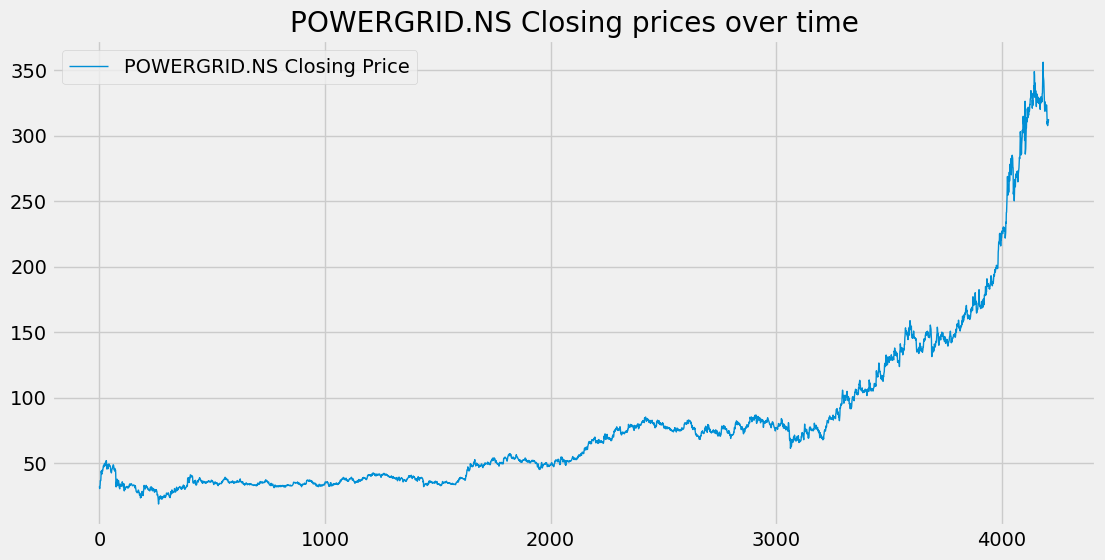

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

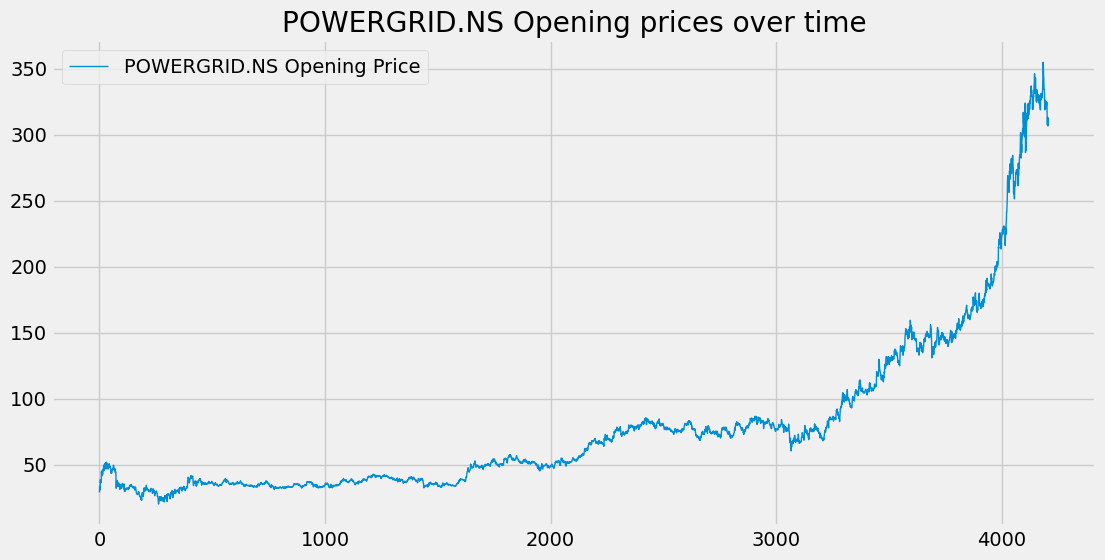

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

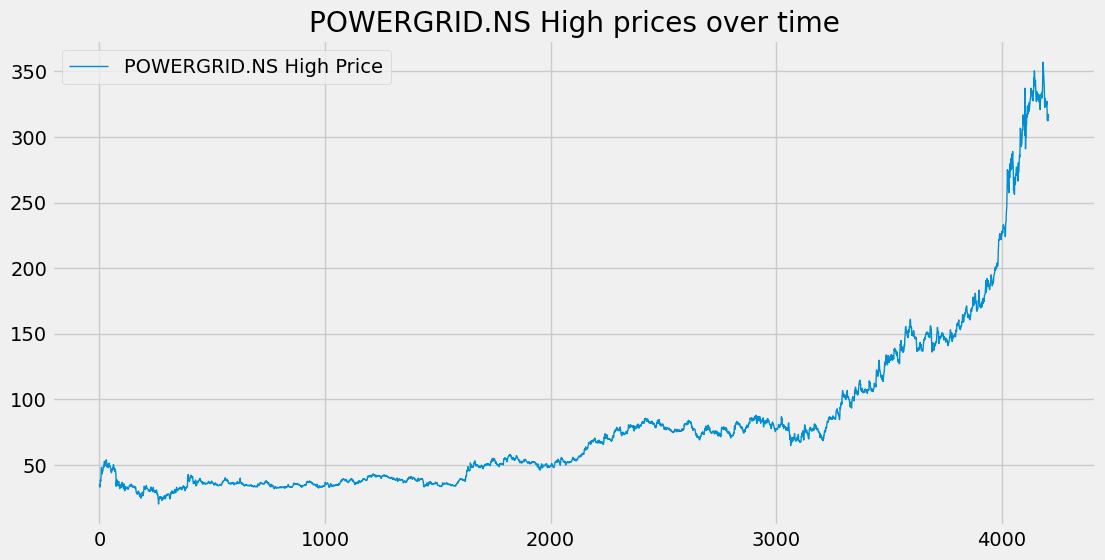

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

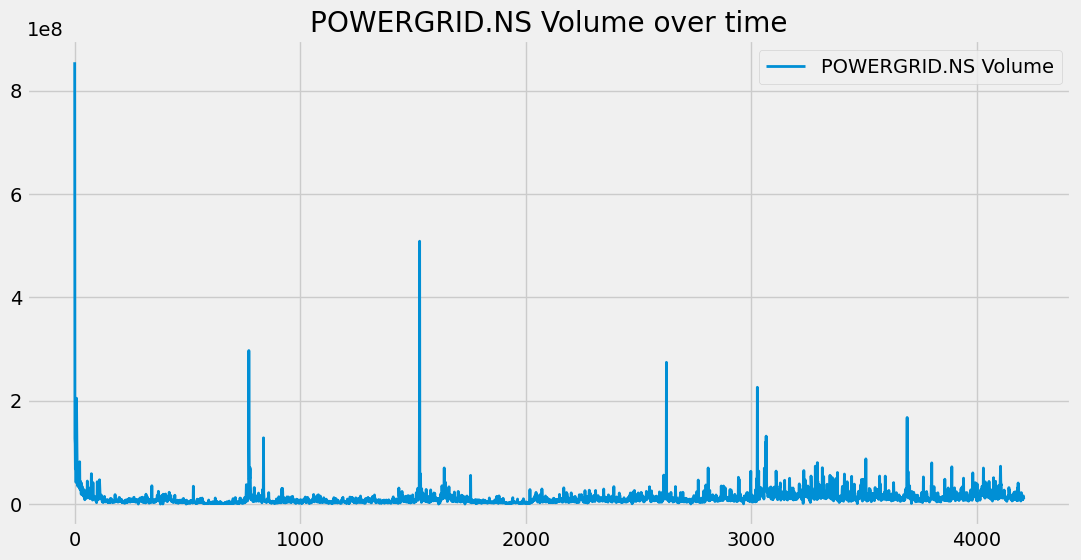

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 2)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

In [20]:
ma100 = df.Close.rolling(100).mean()

In [21]:
ma200 = df.Close.rolling(200).mean()

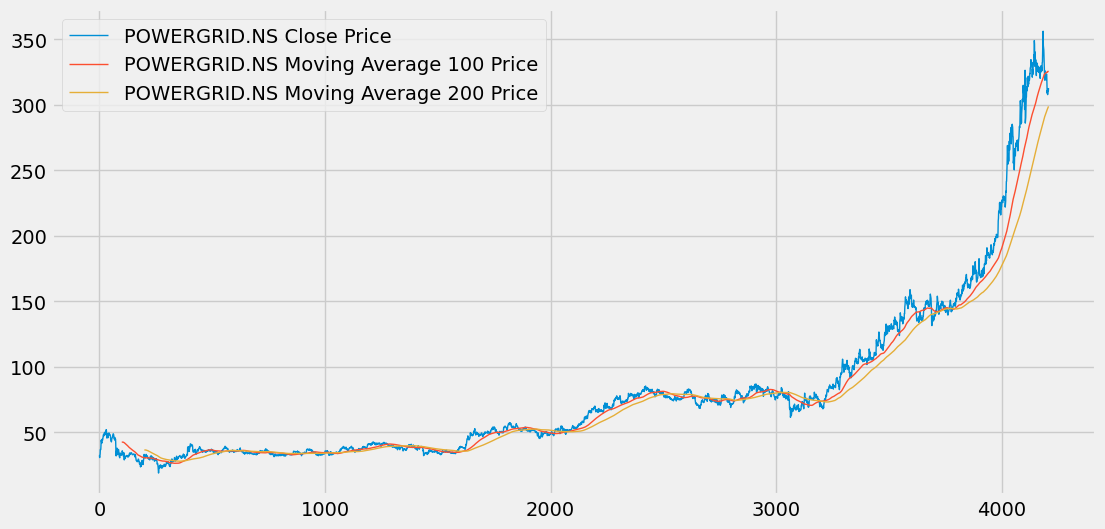

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [23]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()

In [24]:
ema200 = df['Close'].ewm(span=200, adjust = False).mean()

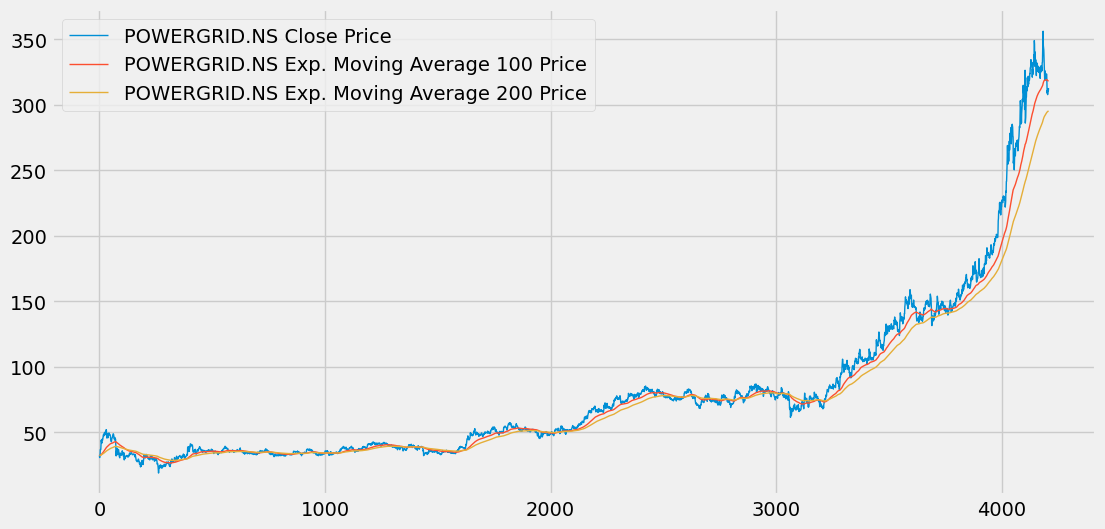

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

# Training & Testing

In [ ]:


data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [27]:
data_training.shape

(2945, 1)

In [28]:
data_testing.shape

(1263, 1)

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [30]:
data_training_array = scaler.fit_transform(data_training)

In [31]:
data_training_array

array([[0.19808597],
       [0.17371825],
       [0.20447375],
       ...,
       [0.90774423],
       [0.86000355],
       [0.87299619]])

In [32]:
data_training_array.shape

(2945, 1)

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

print(type(x_train), type(y_train))
print(len(x_train), len(y_train))
print(x_train[0].shape)
x_train, y_train  = np.array(x_train), np.array(y_train)


<class 'list'> <class 'list'>
2845 2845
(100, 1) ()


In [40]:
x_train.shape #samples , time steps, features

(2845, 100, 1)

# Model Building

In [41]:

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

2025-07-15 14:29:14.365108: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-15 14:29:14.981732: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752569955.180747   11610 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752569955.220119   11610 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752569955.569995   11610 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

LSTM Input -> 3D Array (batch_size, time_steps, seq_len)
LSTM 2D OR 3D
2D -> (batch_sizem units)
3D -> (batch_size, time_steps, units)

In [136]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'tanh', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'tanh', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'tanh', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'tanh'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/home/chanupa/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [137]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [138]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 22s 169ms/step - loss: 0.0473
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 15s 167ms/step - loss: 0.0072
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 15s 167ms/step - loss: 0.0046
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 15s 168ms/step - loss: 0.0045
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 15s 168ms/step - loss: 0.0044
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 15s 167ms/step - loss: 0.0038
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 15s 169ms/step - loss: 0.0038
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 15s 169ms/step - loss: 0.0039
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 15s 168ms/step - loss: 0.0036
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 15s 168ms/step - loss: 0.0031
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 15s 168ms/step - loss: 0.0041
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 15s 168ms/step - loss: 0.0029
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 15s 168ms/step - loss: 0.0027
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 15s 168ms/step - loss: 0.0028
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 15s 

In [150]:
past_100_days = data_training.tail(100)

In [151]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [152]:
input_data = scaler.fit_transform(final_df)

In [153]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [154]:
x_test.shape

(1263, 100, 1)

In [155]:
y_predicted = model.predict(x_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step


In [156]:
y_predicted.shape

(1263, 1)

In [157]:
scaler_factor = 1 / scaler.scale_.shape[0]
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

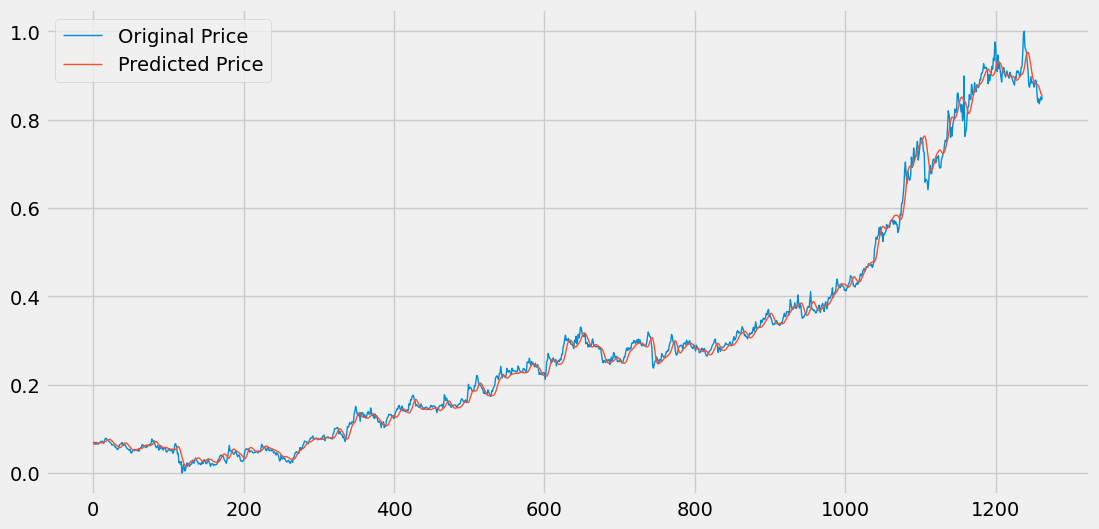

In [158]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [161]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_predicted)
mae = mean_absolute_error(y_test, y_predicted)
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")

MAE: 0.0109
MSE: 0.0003


In [162]:
model.save('stock_dl_model.h5')